In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Read the dataset
data=pd.read_csv("HDI indicators.csv")
#removing missing values
data=data.dropna()

In [ ]:
# Variables names
data.columns

Index(['Country Name', 'HDI', 'CT', 'SMR', 'W-NP', 'GDP', 'TS', 'M-Imp',
       'M-Exp', 'EB-GS', 'PSE', 'SSE', 'HE/c', 'IM-DPT', 'MR<5'],
      dtype='object')

In [ ]:
df=data[data.columns[2:15]] # only numeric variales
df.shape

(115, 13)

In [ ]:
#outliers analysis using IQR (#identifying the outliers through IQR)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CT        2.000000e+00
SMR       8.500000e+00
W-NP      1.535000e+01
GDP       3.499329e+00
TS        1.348409e+01
M-Imp     4.928671e+09
M-Exp     9.162992e+10
EB-GS     1.201211e+01
PSE       5.788881e+00
SSE       1.376675e+01
HE/c      1.250882e+03
IM-DPT    8.000000e+00
MR<5      3.075000e+01
dtype: float64


In [ ]:
#identification of outliers
print((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))

        CT    SMR   W-NP    GDP     TS  M-Imp  M-Exp  EB-GS    PSE    SSE  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False   True  False  False  False  False  False   
5    False  False  False  False   True  False  False  False  False  False   
6    False  False  False  False  False  False  False  False  False  False   
7    False  False  False  False  False  False  False  False  False  False   
8    False  False  False  False  False  False  False  False  False  False   
9    False  False  False  False  False  False  False  False  False  False   
10   False  False  False  False  False  False  False  False  False  False   
11   False  False  False  False  False  False  False  False  False  False   

In [ ]:
#removing outliers
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(101, 13)


In [ ]:
# For correlation scatter matrix
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f33688d1d50>,
      dtype=object)

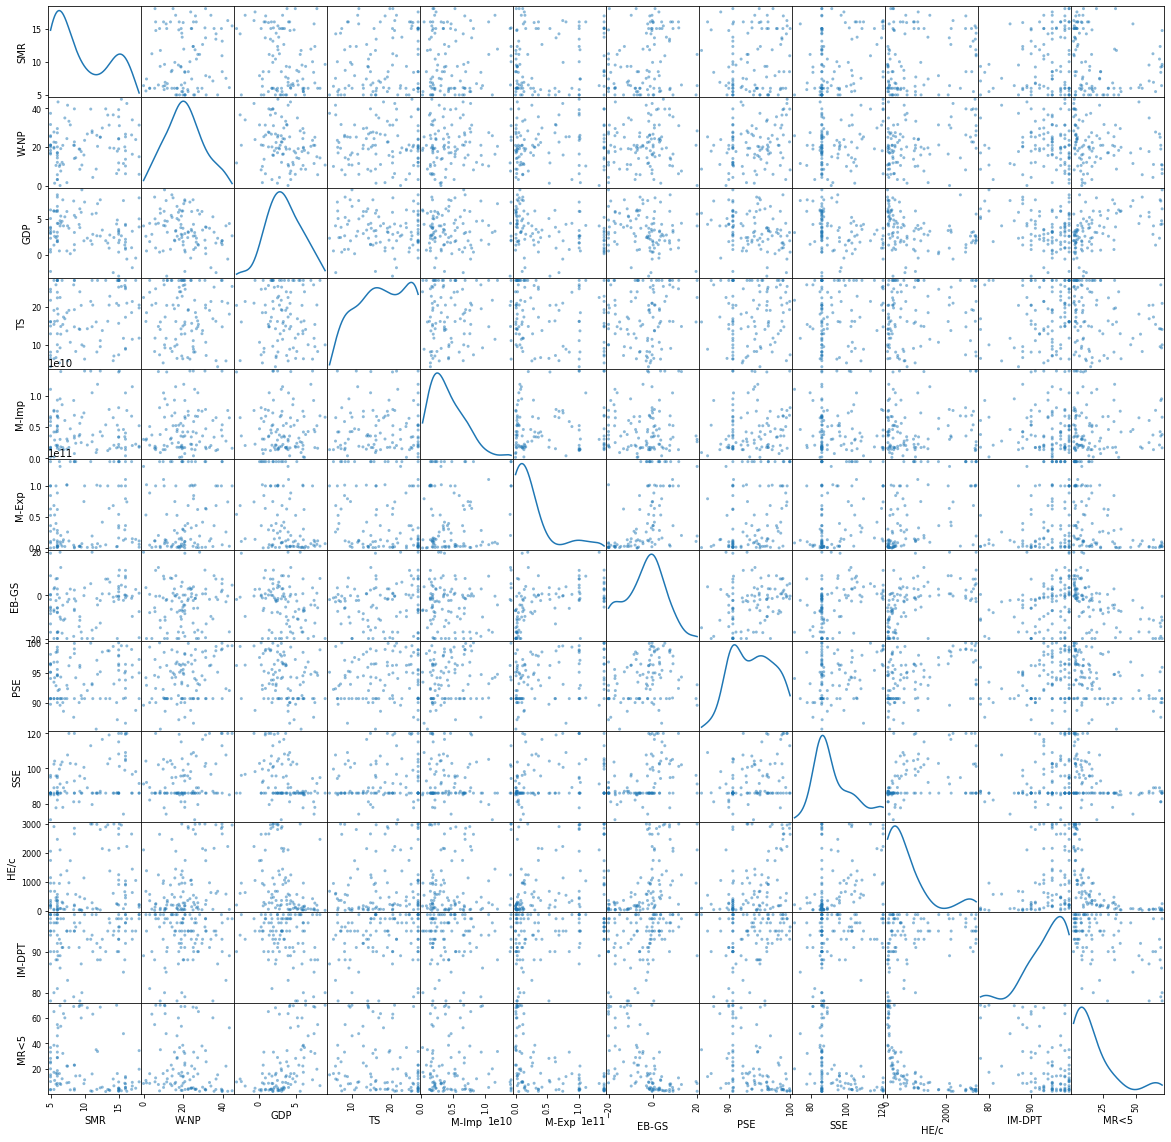

In [ ]:
#linearity of the data
pd.plotting.scatter_matrix(df_out.loc[:,'SMR': 'MR<5'],figsize=(20,20),diagonal='kde') # for further information visit https://www.youtube.com/watch?v=SNurMMcFVy8 

In [ ]:
X=df_out[df_out.columns[1:13]]
y=df_out['CT']

In [ ]:
corr=X.corr()
corr

,SMR,W-NP,GDP,TS,M-Imp,M-Exp,EB-GS,PSE,SSE,HE/c,IM-DPT,MR<5
SMR,1.000000,0.153206,-0.233208,0.173323,0.027807,0.127018,0.219314,0.121565,0.312823,0.260338,0.200043,-0.279292
W-NP,0.153206,1.000000,-0.239807,-0.036107,0.074387,0.105792,0.062885,0.261128,0.280624,0.353703,-0.013238,-0.194921
GDP,-0.233208,-0.239807,1.000000,-0.051994,-0.062626,-0.329511,-0.228851,-0.292737,-0.333413,-0.336372,-0.268720,0.480918
TS,0.173323,-0.036107,-0.051994,1.000000,0.024631,-0.234042,0.100409,0.091169,0.163192,0.142627,0.164971,-0.221624
M-Imp,0.027807,0.074387,-0.062626,0.024631,1.000000,0.054384,0.042518,0.101298,-0.055217,0.152002,0.000354,-0.074590
M-Exp,0.127018,0.105792,-0.329511,-0.234042,0.054384,1.000000,0.500520,0.319227,0.304656,0.570799,0.294223,-0.531848
EB-GS,0.219314,0.062885,-0.228851,0.100409,0.042518,0.500520,1.000000,0.278124,0.408901,0.576356,0.319431,-0.621755
PSE,0.121565,0.261128,-0.292737,0.091169,0.101298,0.319227,0.278124,1.000000,0.317993,0.464865,0.314545,-0.445796
SSE,0.312823,0.280624,-0.333413,0.163192,-0.055217,0.304656,0.408901,0.317993,1.000000,0.390584,0.256611,-0.462304
HE/c,0.260338,0.353703,-0.336372,0.142627,0.152002,0.570799,0.576356,0.464865,0.390584,1.000000,0.288030,-0.645622


In [ ]:
import pingouin as pg # for linearity test
pg.corr(x=X['SMR'], y=X['W-NP'])

C:\Users\Arehm\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\Arehm\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,101,0.153,"[-0.04, 0.34]",0.023,0.004,0.126121,0.394,0.336


In [ ]:
pg.corr(x=X['SMR'], y=X['M-Imp']) # check the linearity between SMR and M-Imp

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,101,0.028,"[-0.17, 0.22]",0.001,-0.02,0.782521,0.129,0.059


In [ ]:
pg.corr(x=X['SMR'], y=X['TS'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,101,0.173,"[-0.02, 0.36]",0.03,0.01,0.083037,0.547,0.413


In [ ]:
pg.corr(x=X['SMR'], y=X['PSE'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,101,0.122,"[-0.08, 0.31]",0.015,-0.005,0.225892,0.256,0.229


In [ ]:
pg.corr(x=X['W-NP'], y=X['TS'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,101,-0.036,"[-0.23, 0.16]",0.001,-0.019,0.719989,0.133,0.065


In [ ]:
#spliting the data into training and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Applying Kernel PCA
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=14)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
#confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, y_pred)

array([[11,  0,  0,  0],
       [ 1,  6,  0,  0],
       [ 0,  3,  2,  0],
       [ 0,  0,  2,  1]], dtype=int64)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        11
         1.0       0.67      0.86      0.75         7
         2.0       0.50      0.40      0.44         5
         3.0       1.00      0.33      0.50         3

   micro avg       0.77      0.77      0.77        26
   macro avg       0.77      0.65      0.66        26
weighted avg       0.78      0.77      0.75        26



In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7692307692307693


In [ ]:
#comparing error rate with the value of k
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

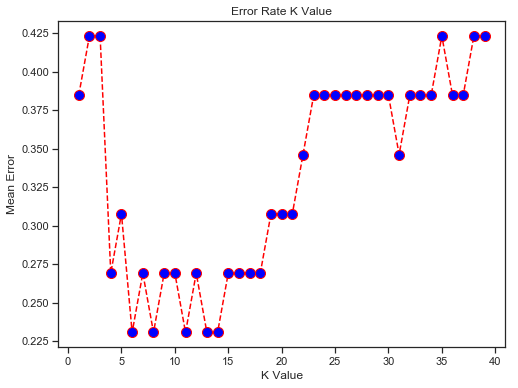

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

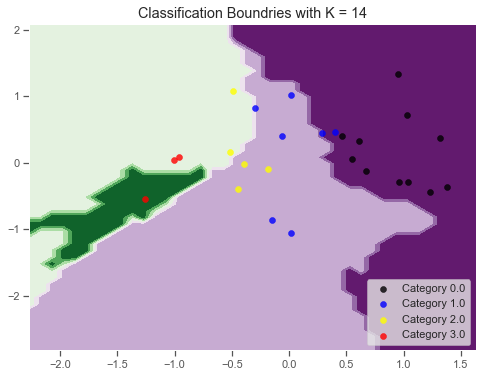

In [ ]:
import matplotlib.pyplot as plt 
import matplotlib
import numpy as np
%matplotlib inline
matplotlib.style.use('ggplot') 

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
padding = 0.1
resolution = 0.1

colors = {0: 'black', 1: 'blue', 2: 'yellow', 3: 'red'}
x_min, x_max = X_train[:, 0].min(), X_train[:, 0].max()
y_min, y_max = X_train[:, 1].min(), X_train[:, 1].max()
x_range = x_max - x_min
y_range = y_max - y_min
x_min -= x_range * padding
y_min -= y_range * padding
x_max += x_range * padding
y_max += y_range * padding

# Get decision boundaries from model
xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                     np.arange(y_min, y_max, resolution))
 
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour map
plt.contourf(xx, yy, Z, cmap=plt.cm.PRGn)
plt.axis('tight')

# Plot your testing points as wel
for label in np.unique(y_test):
    indices = np.where(y_test == label)
    plt.scatter(X_test[indices, 0], X_test[indices, 1], c=colors[label], alpha=0.8, 
                label='Category {}'.format(label))

plt.legend(loc='lower right')
plt.title('Classification Boundries with K = {}'.format(14))
plt.show()